# Credit Card Approval dataset


## Columns explained

Application records csv-file:

- ID - client number
- CODE_GENDER - Gender
- FLAG_OWN_CAR - Is there a car
- FLAG_OWN_REALTY - Is there a property
- CNT_CHILDREN - Number of children
- AMT_INCOME_TOTAL - Annual income
- NAME_INCOME_TYPE - Income category
- NAME_EDUCATION_TYPE - Education level
- NAME_FAMILY_STATUS - Marital status
- NAME_HOUSING_TYPE - Way of living
- DAYS_BIRTH - Days since birth
- DAYS_EMPLOYED - Start date of employment (Counts backwards. Positive means the person is currently unemployed)
- FLAG_MOBIL - Is there a mobile phone
- FLAG_WORK_PHONE - Is there a work phone
- FLAG_PHONE - Is there a phone
- FLAG_EMAIL - Is there an email
- OCCUPATION_TYPE - Type of occupation
- CNT_FAM_MEMBERS - Family size
    

# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

application_records = pd.read_csv('application_record.csv')

In [2]:
application_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [3]:
application_records.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

# Preliminary data cleaning and visualisations

In [4]:
column_names = ['gender', 'has_car', 'has_property', 'amt_children', 'annual_income', 'income_type', 'education_level', 
               'family_status', 'housing_type', 'has_mphone', 'has_wphone', 'has_email', 'occupation_type']

In [5]:
records_updated = application_records.drop(columns=['ID', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE', 'CNT_FAM_MEMBERS'])
records_updated.columns = column_names
records_updated.columns

Index(['gender', 'has_car', 'has_property', 'amt_children', 'annual_income',
       'income_type', 'education_level', 'family_status', 'housing_type',
       'has_mphone', 'has_wphone', 'has_email', 'occupation_type'],
      dtype='object')

In [6]:
records_updated.head()

,gender,has_car,has_property,amt_children,annual_income,income_type,education_level,family_status,housing_type,has_mphone,has_wphone,has_email,occupation_type
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,NaN
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,NaN
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,Security staff
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,Sales staff
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,Sales staff


In [7]:
print(records_updated['gender'].value_counts())
print(records_updated['has_car'].value_counts())
print(records_updated['has_property'].value_counts())
print(records_updated['has_mphone'].value_counts())
print(records_updated['has_wphone'].value_counts())
print(records_updated['has_email'].value_counts())

F    294440
M    144117
Name: gender, dtype: int64
N    275459
Y    163098
Name: has_car, dtype: int64
Y    304074
N    134483
Name: has_property, dtype: int64
1    438557
Name: has_mphone, dtype: int64
0    348156
1     90401
Name: has_wphone, dtype: int64
0    391102
1     47455
Name: has_email, dtype: int64


Based on the value counts, we can remove `has_mphone` column as there is 0 variance.

In [8]:
records_updated = records_updated.drop(columns=['has_mphone'])
records_updated.columns

Index(['gender', 'has_car', 'has_property', 'amt_children', 'annual_income',
       'income_type', 'education_level', 'family_status', 'housing_type',
       'has_wphone', 'has_email', 'occupation_type'],
      dtype='object')

In [9]:
print(records_updated['occupation_type'].unique())
print(records_updated['occupation_type'].value_counts(dropna=False))

[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: occupation_type, dtype: int64


In [10]:
pct_missing_data = records_updated['occupation_type'].isna().sum() / records_updated['occupation_type'].count()
print(f'Missing data % of the occupation type column: {pct_missing_data}%')

Missing data % of the occupation type column: 0.44094376942639163%


In [11]:
missing_data_occupation = records_updated[records_updated['occupation_type'].isna()]
missing_data_occupation.head(10)

,gender,has_car,has_property,amt_children,annual_income,income_type,education_level,family_status,housing_type,has_wphone,has_email,occupation_type
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,NaN
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,NaN
7,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,NaN
8,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,NaN
9,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,NaN
24,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,NaN
25,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,NaN
26,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,NaN
76,F,N,Y,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0,0,NaN
144,M,N,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,NaN


In [12]:
missing_data_occupation.groupby(['gender', 'education_level'])['occupation_type'].value_counts(dropna=False)

gender  education_level                occupation_type
F       Academic degree                NaN                   60
        Higher education               NaN                23217
        Incomplete higher              NaN                 2094
        Lower secondary                NaN                 1543
        Secondary / secondary special  NaN                77114
M       Academic degree                NaN                   27
        Higher education               NaN                 8642
        Incomplete higher              NaN                 1122
        Lower secondary                NaN                  469
        Secondary / secondary special  NaN                19915
Name: occupation_type, dtype: int64

In [13]:
records_updated.groupby('education_level')['gender'].value_counts()

education_level                gender
Academic degree                F            251
                               M             61
Higher education               F          80100
                               M          37422
Incomplete higher              F           8578
                               M           6273
Lower secondary                F           2433
                               M           1618
Secondary / secondary special  F         203078
                               M          98743
Name: gender, dtype: int64

By the looks of it, `occupation_type` data is not completely randomly missing but difficult to pinpoint the exact underlying reason. For instance, it seems that higher percentage of women with lower education levels have not reported their occupation type. Either the column is dropped completely or rows with unknown occupation type are dropped for the learning model.

In [14]:
incomes = records_updated['annual_income']

print(incomes.sort_values(ascending=False).head(10))
print(incomes.sort_values(ascending=True).head(10))

228164    6750000.0
228163    6750000.0
228162    6750000.0
228161    6750000.0
228160    6750000.0
228159    6750000.0
421262    6750000.0
282690    4500000.0
282693    4500000.0
282696    4500000.0
Name: annual_income, dtype: float64
436891    26100.0
273113    26100.0
107945    27000.0
92482     27000.0
43819     27000.0
43818     27000.0
43817     27000.0
304716    27000.0
304715    27000.0
304714    27000.0
Name: annual_income, dtype: float64


In [15]:
print(f'Median income: {np.median(incomes)}')

print(f'interquartile range from 25% to 75%: {np.quantile(incomes, 0.25)} - {np.quantile(incomes, 0.75)}')

Median income: 160780.5
interquartile range from 25% to 75%: 121500.0 - 225000.0


In [16]:
print(f'The 0.01% of the incomes: {round(np.quantile(incomes, 0.999))}+')

The 0.01% of the incomes: 990000+


There are some very high earners in the dataset who are earning above millions, but they are in the 0.01% of the dataset. We shall leave these outliers there for now. 

In [17]:
records_updated.isna().any()

gender             False
has_car            False
has_property       False
amt_children       False
annual_income      False
income_type        False
education_level    False
family_status      False
housing_type       False
has_wphone         False
has_email          False
occupation_type     True
dtype: bool

# Data visualisations after cleaning the data

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

### Simple categorical columns

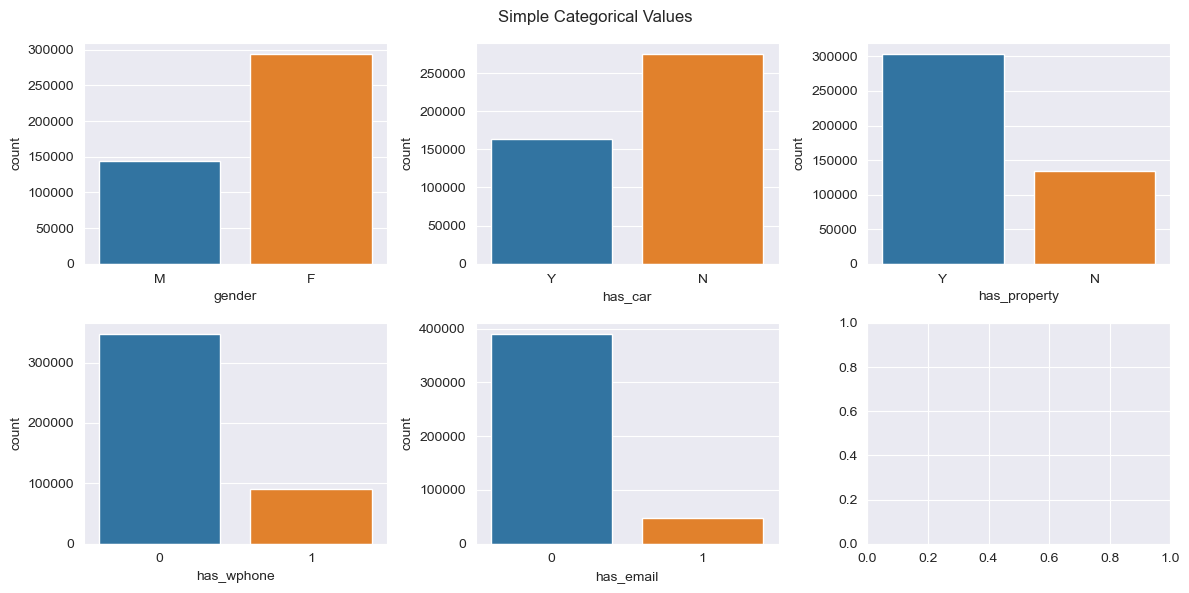

In [19]:
simple_cat_cols = ['gender', 'has_car', 'has_property', 'has_wphone', 'has_email']

fig, axs = plt.subplots(2, 3, figsize=(12,6))

for col, ax in zip(simple_cat_cols, axs.flat):
    sns.countplot(data=records_updated, x=col, ax=ax)
    

fig.suptitle('Simple Categorical Values')
plt.tight_layout()

`has_email` column might be useful to delete for model simplicity as the variance is rather low.

### Annual income examination

In [20]:
records_updated['annual_income'].describe()

count    4.385570e+05
mean     1.875243e+05
std      1.100869e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.607805e+05
75%      2.250000e+05
max      6.750000e+06
Name: annual_income, dtype: float64

Median income: 160780.5


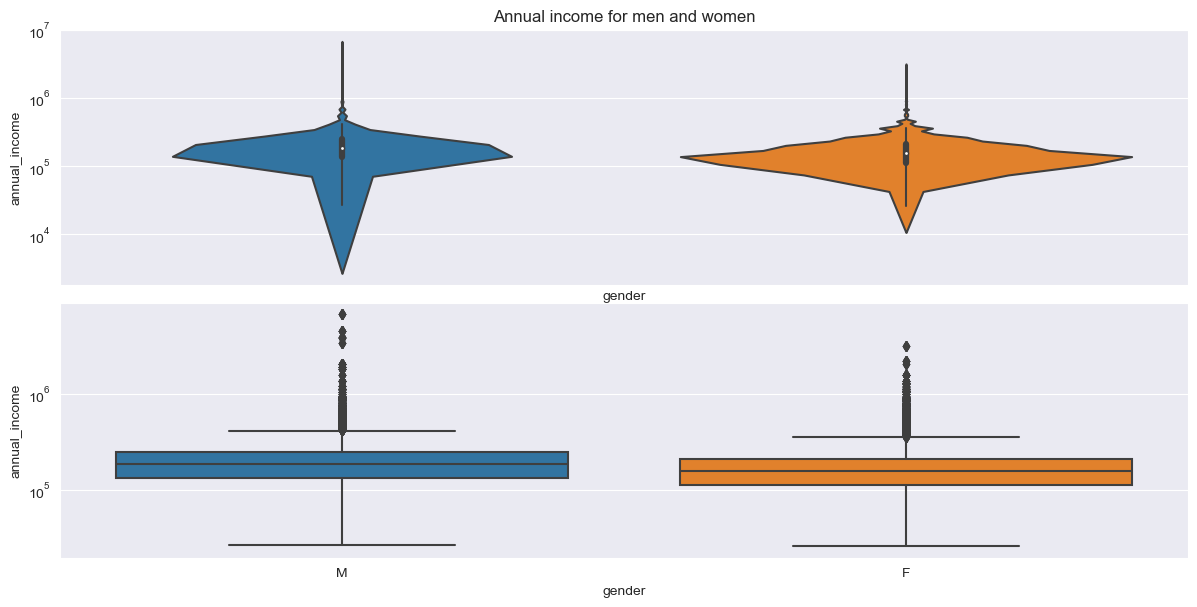

In [88]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)
axs[0].set_title('Annual income for men and women')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
fig.tight_layout()

sns.violinplot(data=records_updated, x='gender', y='annual_income', ax=axs[0])
sns.boxplot(data=records_updated, x='gender', y='annual_income', ax=axs[1])

print(f'Median income: {incomes.median()}')

[Text(0.5, 1.0, 'Income Distribution'), Text(0.5, 0, 'Annual Income')]

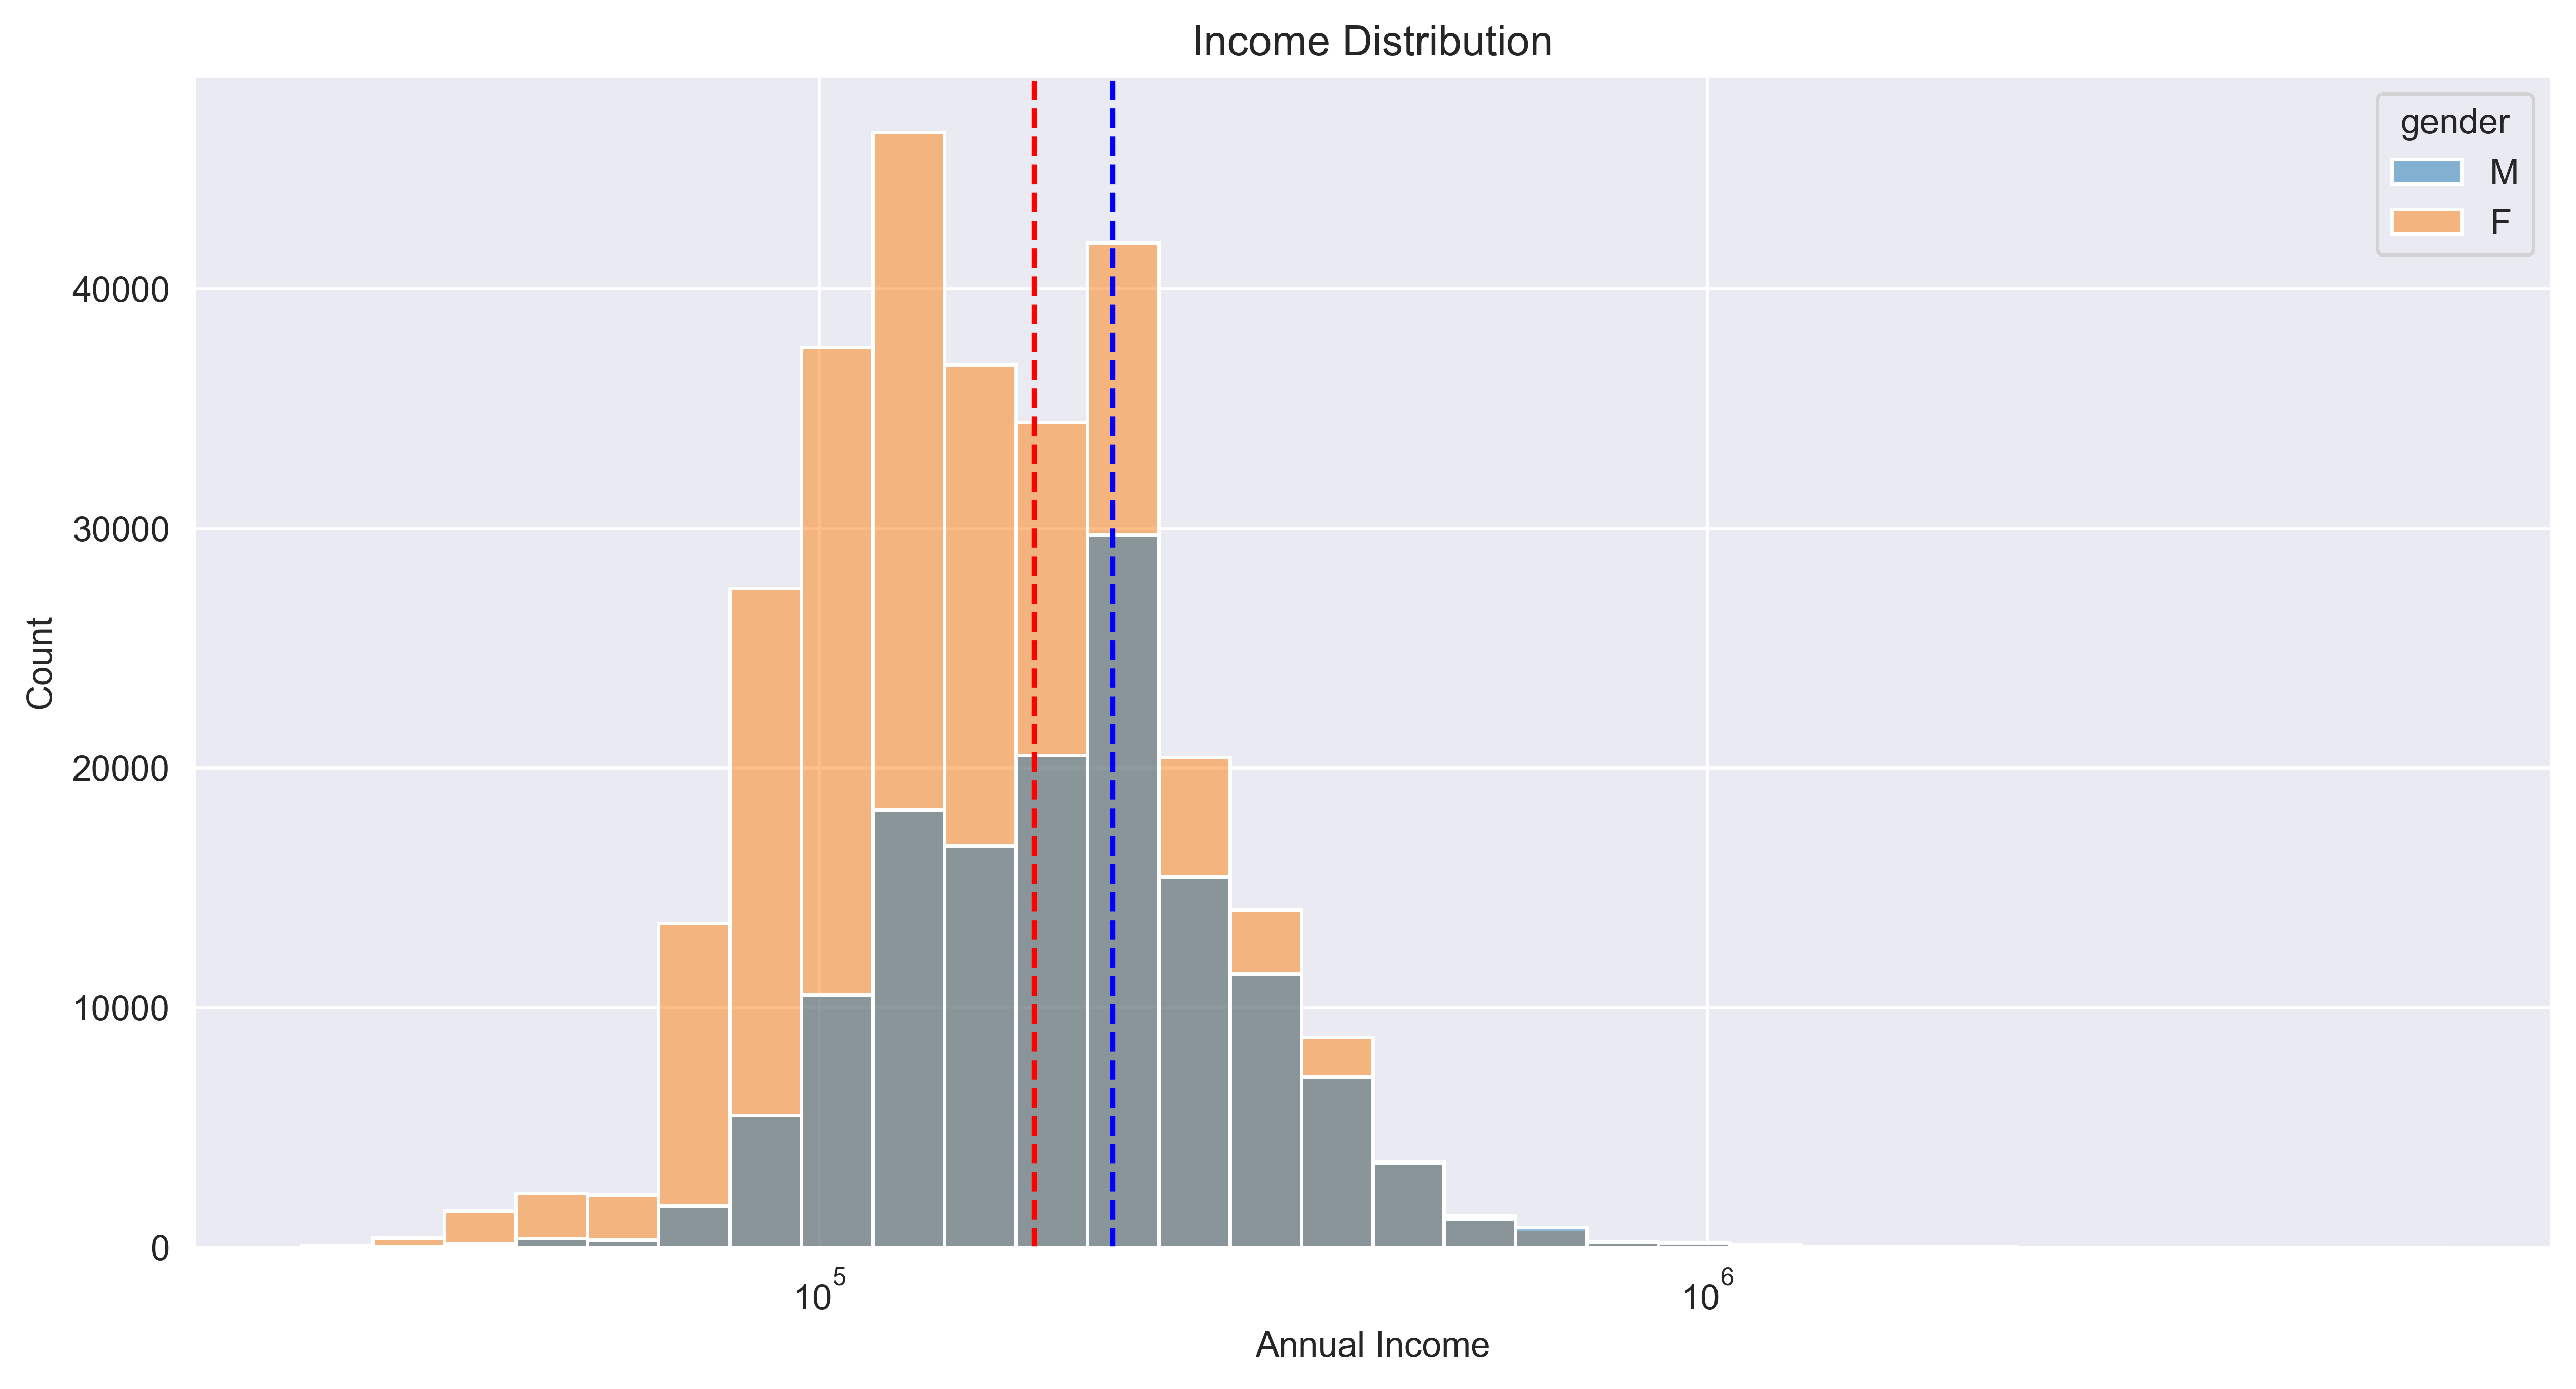

In [86]:
fig, ax = plt.subplots(figsize=(12,6), dpi=500)
sns.histplot(data=records_updated, x=records_updated['annual_income'], hue='gender', log_scale=True, bins=30)


men_mean = records_updated[records_updated['gender'] == 'M']['annual_income'].mean()
women_mean = records_updated[records_updated['gender'] == 'F']['annual_income'].mean()

plt.axvline(men_mean, linestyle='--', color='blue')
plt.axvline(women_mean, linestyle='--', color='red')

ax.set(
    title='Income Distribution',
    xlabel='Annual Income',
)

There is a small group of outliers earning millions, skewing the distribution. For model performance, it is a possibility to remove the highest earners. This could be done my limiting the earnings to those who earn below certain amount, or utilizing Numpy's quantile function.

### Other categorical Valuables

In [313]:
object_cols = records_updated.select_dtypes(include='object').columns
print(object_cols)

Index(['gender', 'has_car', 'has_property', 'income_type', 'education_level',
       'family_status', 'housing_type', 'occupation_type'],
      dtype='object')


<AxesSubplot:xlabel='income_type', ylabel='count'>

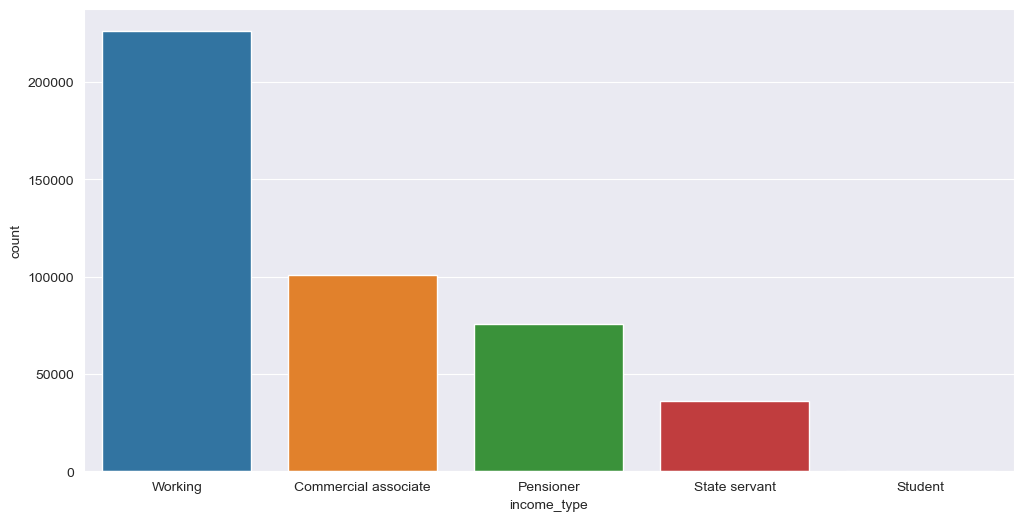

In [314]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=records_updated, x='income_type')

<AxesSubplot:xlabel='education_level', ylabel='count'>

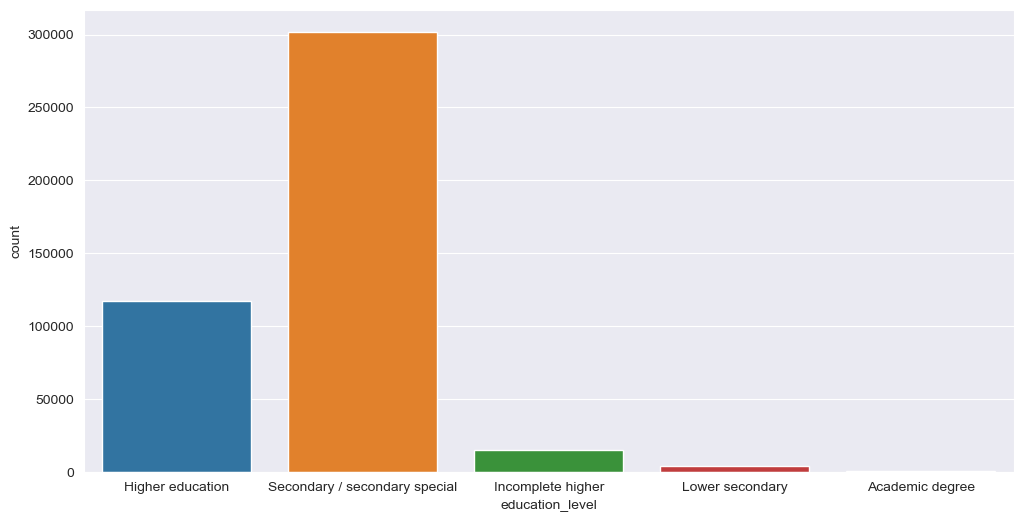

In [315]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=records_updated, x='education_level')

<AxesSubplot:xlabel='family_status', ylabel='count'>

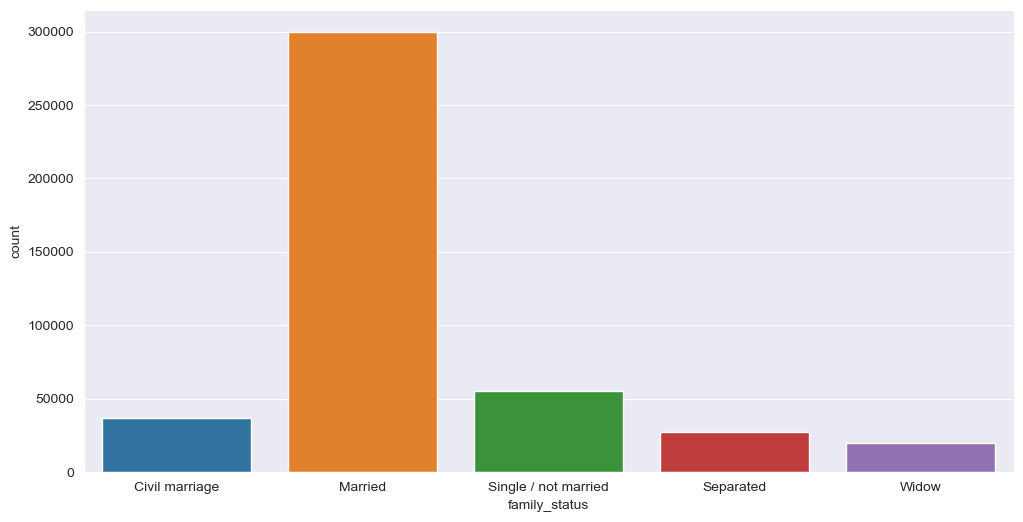

In [316]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=records_updated, x='family_status')

<AxesSubplot:xlabel='housing_type', ylabel='count'>

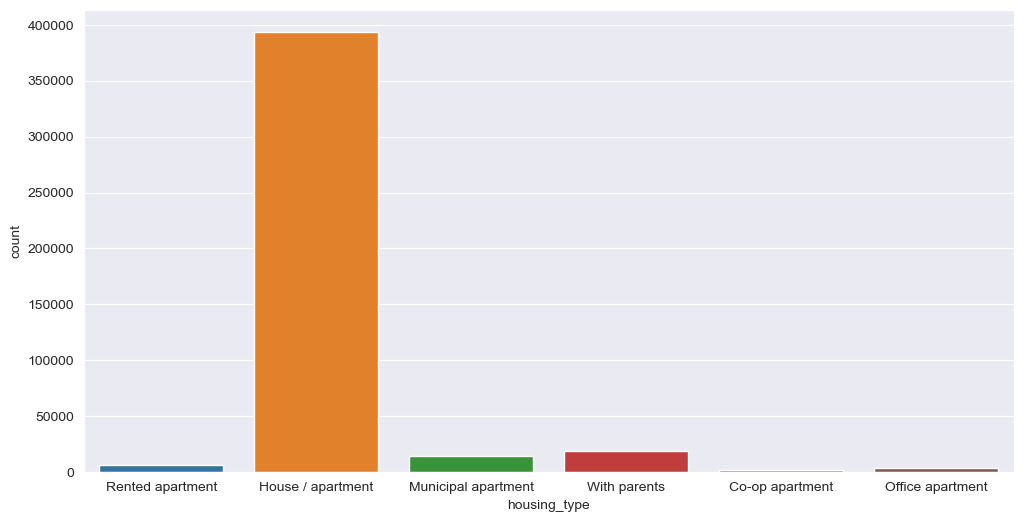

In [317]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=records_updated, x='housing_type')

In [318]:
housing_type_col = records_updated['housing_type']

pct_housing_types = housing_type_col.value_counts() / housing_type_col.count() * 100
print(pct_housing_types)

House / apartment      89.801554
With parents            4.349948
Municipal apartment     3.241084
Rented apartment        1.362195
Office apartment        0.894297
Co-op apartment         0.350924
Name: housing_type, dtype: float64


For the sake of simplifying the dataset, we could remove the `housing_type` column as it has very little variance and one-hot encoding would bring about extra columns for the learning model with little to offer. Alternatively, binning could be done to simplify the data. Binning could be considered for other columns as well, such as the `education_level` column. We can create seperate feature datasets for the model to test how they affect the accuracy.

# Dataset preparation for learning models

We will apply linear regression to try and predict the annual income of a person. The models that will be used are:
- Simple Linear Regression
- Random Forest Regression Model
- Extreme Gradient Boosting using XGBoost Regressor 

### Creating feature and target sets

We will create two different feature sets. 
- The first with binning and removing the `occupation_type` column completely.
- The second without categorical column binning and removing `NaN` values on the `occupation_type` column. 

In [319]:
import copy

df1 = copy.deepcopy(records_updated)
df2 = copy.deepcopy(records_updated)

df1.head()

,gender,has_car,has_property,amt_children,annual_income,income_type,education_level,family_status,housing_type,has_wphone,has_email,occupation_type
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,NaN
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,NaN
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,Security staff
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,Sales staff
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,Sales staff


### Processing dataset 1

In [320]:
df1 = df1.drop(columns=['occupation_type'])
df1.columns

Index(['gender', 'has_car', 'has_property', 'amt_children', 'annual_income',
       'income_type', 'education_level', 'family_status', 'housing_type',
       'has_wphone', 'has_email'],
      dtype='object')

In [321]:
df1['gender'] = np.where(df1['gender'] == 'M', 1, 0)
df1['has_car'] = np.where(df1['has_car'] == 'Y', 1, 0)
df1['has_property'] = np.where(df1['has_property'] == 'Y', 1, 0)

#df1.head()

In [322]:
df1['housing_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [323]:
df1['education_level'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [324]:
housing_map = {
    'House / apartment': 'House / apartment',
    'Rented apartment': 'Other',
    'Municipal apartment':'Other',
    'With parents':'Other',
    'Co-op apartment':'Other',
    'Office apartment':'Other',}

education_map = {
    'Secondary / secondary special':'Lower_ed',
    'Higher education':'Higher_ed',
    'Incomplete higher':'Higher_ed',
    'Lower secondary':'Lower_ed',
    'Academic degree':'Higher_ed'}

df1['housing_type'] = df1['housing_type'].map(housing_map)
df1['education_level'] = df1['education_level'].map(education_map)

df1.head()

,gender,has_car,has_property,amt_children,annual_income,income_type,education_level,family_status,housing_type,has_wphone,has_email
0,1,1,1,0,427500.0,Working,Higher_ed,Civil marriage,Other,1,0
1,1,1,1,0,427500.0,Working,Higher_ed,Civil marriage,Other,1,0
2,1,1,1,0,112500.0,Working,Lower_ed,Married,House / apartment,0,0
3,0,0,1,0,270000.0,Commercial associate,Lower_ed,Single / not married,House / apartment,0,1
4,0,0,1,0,270000.0,Commercial associate,Lower_ed,Single / not married,House / apartment,0,1


In [325]:
print(df1['education_level'].unique())
print(df1['housing_type'].unique())

['Higher_ed' 'Lower_ed']
['Other' 'House / apartment']


In [326]:
df1 = pd.get_dummies(df1, columns=['income_type', 'education_level', 'family_status', 'housing_type'], drop_first=True)

`drop_first` set to True as we want to avoid multicolinnearity.

In [327]:
print(df1.shape)
df1.head()

(438557, 17)


,gender,has_car,has_property,amt_children,annual_income,has_wphone,has_email,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,education_level_Lower_ed,family_status_Married,family_status_Separated,family_status_Single / not married,family_status_Widow,housing_type_Other
0,1,1,1,0,427500.0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,1,1,0,427500.0,1,0,0,0,0,1,0,0,0,0,0,1
2,1,1,1,0,112500.0,0,0,0,0,0,1,1,1,0,0,0,0
3,0,0,1,0,270000.0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,270000.0,0,1,0,0,0,0,1,0,0,1,0,0


In [328]:
features = df1.drop('annual_income', axis=1)
target = df1['annual_income']

# Feature correlation check

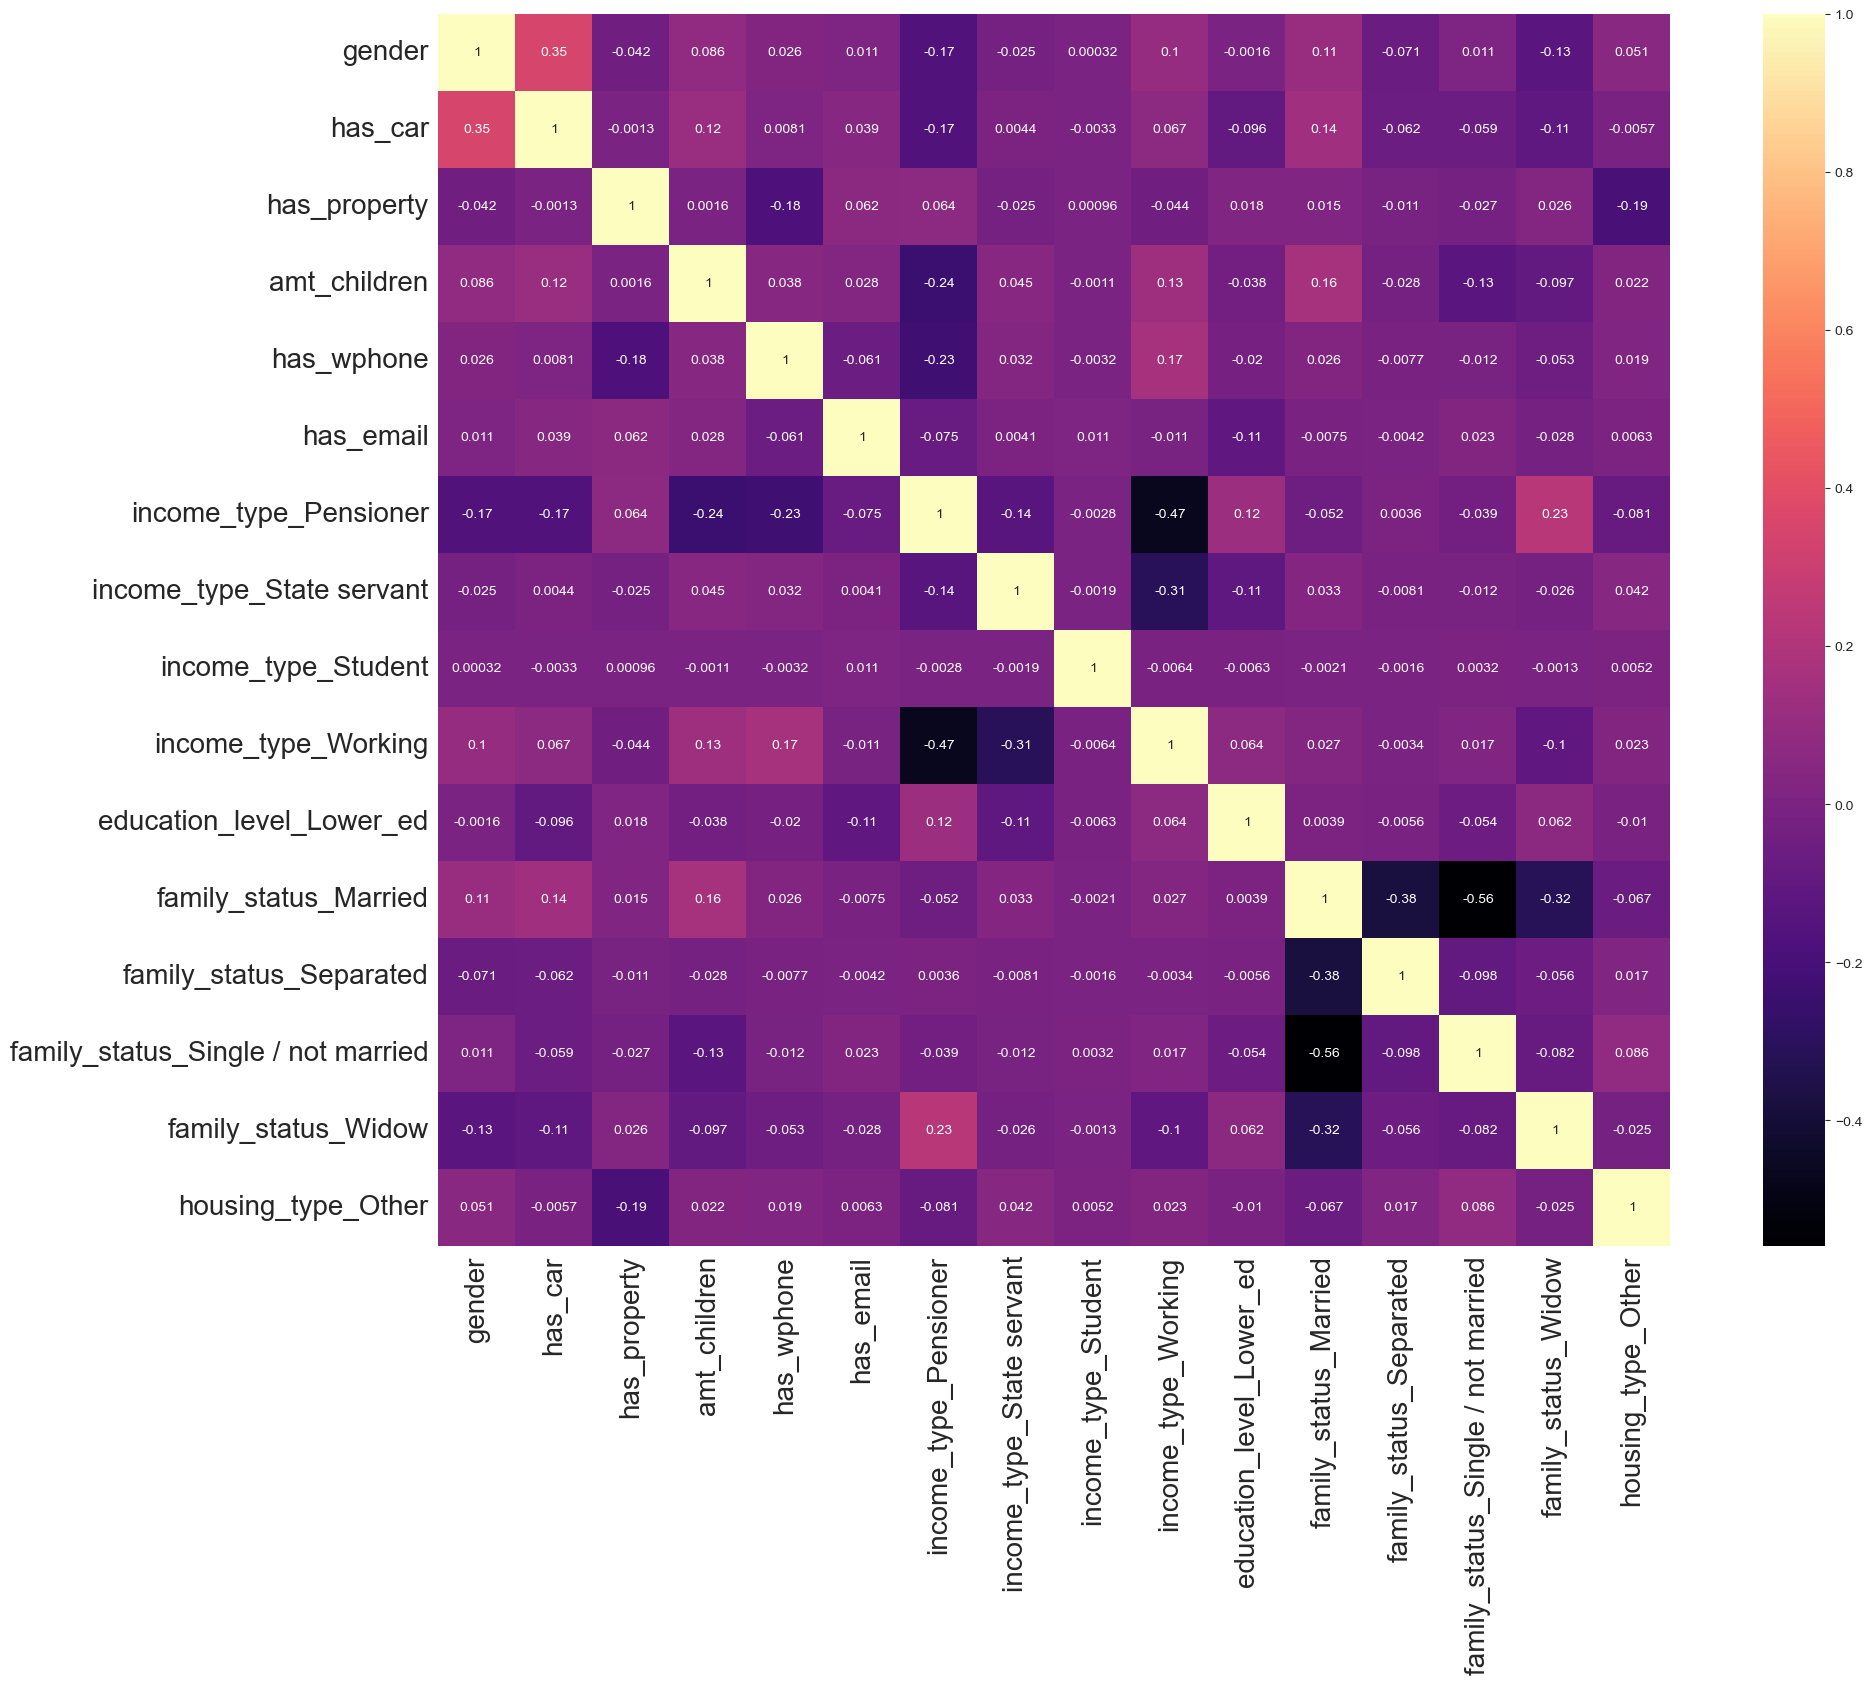

In [329]:
corr_mat1 = features1.corr()

fig, ax = plt.subplots(figsize=(24,16))

sns.heatmap(data=corr_mat1, annot=True, ax=ax, cmap='magma', square=True)
ax.tick_params(labelsize=20)

There are quite many columns, but the colormapping gives enough information about the correlation between different features. Understandably most correlation between features is found on features that can be used for predicting another feature. E.g. `family_status` column as these features are mutually exclusive. Hence multicolinnearity happens. We can keep the columns for now.

Besides the `family_status` and `income_type` columns, from the heatmap we can see that owning a car is positively correlated with the gender of the person. We will leave them as they are for now.

# Modelling with three regression models

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [331]:
def modelling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = mean_absolute_error(y_test, predictions)
    print('MAE:', score)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [333]:
model = LinearRegression()
modelling(model, X_train, X_test, y_train, y_test)

model = RandomForestRegressor(n_estimators=100, random_state=0)
modelling(model, X_train, X_test, y_train, y_test)

model = XGBRegressor()
modelling(model, X_train, X_test, y_train, y_test)

MAE: 65383.67002465307
MAE: 62786.54922117703
MAE: 64134.55458584629


Performing cross-validations and examining the MAE scores for Random Forest and XGB regressors.

In [334]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [335]:
my_pipeline = Pipeline(steps=[
                              ('model', RandomForestRegressor(n_estimators=100, random_state=0))
                             ])

In [336]:
%%timeit -n 1 -r 1
# Multiply by -1 since sklearn calculates *negative* MAE
scores_rfr = -1 * cross_val_score(my_pipeline, features, target,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores_rfr)

MAE scores:
 [66311.5093969  66135.17541324 67290.82950264 66567.63831902
 65652.86170957]
1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [337]:
print(np.mean(scores_rfr))

66391.60286827447


In [338]:
my_pipeline = Pipeline(steps=[
                              ('model', XGBRegressor(random_state=0))
                             ])

In [339]:
%%timeit -n 1 -r 1
scores_xgboost = -1 * cross_val_score(my_pipeline, features, target,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores_xgboost)

MAE scores:
 [65126.19666986 65012.98783244 66122.43016596 65619.77153172
 64608.85923579]
11.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [340]:
print(np.mean(scores_xgboost))

65298.04908715426


Overall, Extreme Gradient Boosting Regressor seems to do a better job compared to Random Forest Regressor, but we have to keep in mind that both of those regressors are being run with default parameters. Tuning the hyperparameters for each could result in a different outcome, one in favour for Random Forests. 

We can also try using principal component analysis (PCA) for improving both model performances. Ideally the training time would decrease and we also avoid overfitting while retaining most of the initial information.

# Creating a dataset for regression using Principal Component Analysis

In [341]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [342]:
scaler = StandardScaler()
features_scaled = StandardScaler().fit_transform(features)

pca = PCA()
features_pca = pca.fit(features_scaled)

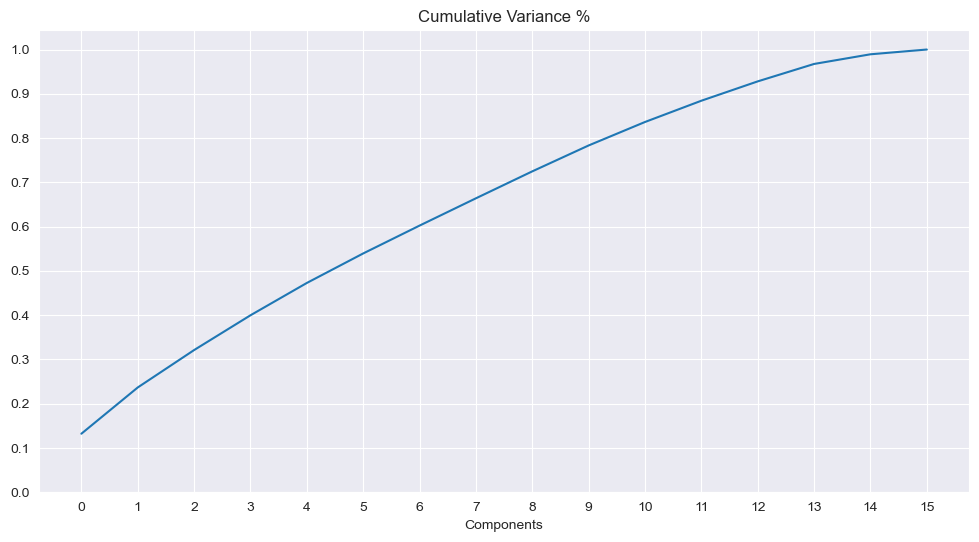

In [343]:
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x=np.arange(0, features.shape[1]), y=np.cumsum(features_pca.explained_variance_ratio_), ax=ax)
ax.set_xticks(np.arange(0, features.shape[1]))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_title('Cumulative Variance %')
ax.set_xlabel('Components')
plt.show()

We can see that more than 90% of the variance is explained by 13 components, hence we can remove the last 3 components. It can be argued that using only 12 components is enough as well but to be safe we are hovering over the 90% threshold with 13 components.

In [344]:
pca = PCA(n_components=13)
features_pca = pca.fit_transform(features_scaled)

component_cols = [f'PC{i}' for i in np.arange(1,14,1)]
df_pca = pd.DataFrame(data=features_pca, columns=component_cols)

print(df_pca.shape)
df_pca.head()

(438557, 13)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.465891,2.182390,0.681607,0.110905,-1.202761,-0.696663,0.154680,-0.048525,0.778577,-0.721917,0.520277,-2.310908,2.242225
1,1.465891,2.182390,0.681607,0.110905,-1.202761,-0.696663,0.154680,-0.048525,0.778577,-0.721917,0.520277,-2.310908,2.242225
2,1.409721,-0.514385,-0.768562,-1.325988,-0.910707,-0.608072,-0.297873,0.476590,-0.212375,0.085451,-0.409894,-0.880086,-0.515443
3,-1.825623,1.645195,0.981733,-1.975535,0.549730,1.844824,0.473099,-1.011015,-0.374284,0.083515,-1.864053,0.965558,0.122048
4,-1.825623,1.645195,0.981733,-1.975535,0.549730,1.844824,0.473099,-1.011015,-0.374284,0.083515,-1.864053,0.965558,0.122048


In [345]:
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns = component_cols,
    index = features.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
gender,0.319893,0.042712,0.098158,-0.293836,-0.428663,-0.309971,-0.058423,0.124957,0.041542,0.003497,-0.180436,0.014337,0.055222
has_car,0.327876,-0.040793,0.182855,-0.331826,-0.270184,-0.332445,-0.097282,0.169361,0.169607,-0.124857,0.018606,-0.018967,0.018321
has_property,-0.089362,-0.216363,-0.056565,-0.502613,0.323334,0.107966,-0.127560,0.129074,-0.061413,0.302024,-0.054198,-0.466324,0.473320
amt_children,0.316584,-0.041243,0.029251,0.027678,0.268163,-0.096005,0.059852,-0.112662,0.267980,0.516691,0.261064,0.569337,0.251708
has_wphone,0.207569,0.217005,-0.095034,0.421260,0.050675,0.146476,-0.197437,0.316223,0.135431,-0.308000,-0.291644,0.050445,0.596909
has_email,0.044754,0.024495,0.230841,-0.323035,0.262264,0.175573,0.304812,-0.433892,0.219790,-0.306939,-0.531278,0.173265,0.017762
income_type_Pensioner,-0.454889,-0.324326,-0.041232,-0.026077,-0.254178,-0.115817,0.057089,-0.057074,-0.066458,-0.158110,0.090200,0.250234,0.290759
income_type_State servant,0.008161,-0.076254,0.602131,0.292328,0.136973,0.010684,-0.174911,0.191549,0.015992,0.328840,-0.301070,-0.159391,-0.260188
income_type_Student,-0.002114,0.004032,0.025208,-0.017608,0.009777,0.066236,0.810909,0.577790,-0.020982,0.049715,0.005669,0.001508,-0.007272
income_type_Working,0.343170,0.316260,-0.478424,-0.095145,0.125753,0.116618,0.031442,-0.052760,0.066645,0.000363,0.076675,-0.214518,-0.254818


In [352]:
my_pipeline = Pipeline(steps=[
                              ('model', RandomForestRegressor(n_estimators=100, random_state=0))
                             ])

In [353]:
%%timeit -n 1 -r 1
scores_pca_rfr = -1 * cross_val_score(my_pipeline, features_pca, target,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores_pca_rfr)

MAE scores:
 [65962.12112275 65969.1205803  67220.22621847 66464.30613317
 65504.0088965 ]
3min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [348]:
print(np.mean(scores_pca_rfr))

66223.95659023707


In [349]:
my_pipeline = Pipeline(steps=[
                              ('model', XGBRegressor(random_state=0))
                             ])

In [350]:
%%timeit -n 1 -r 1
scores_pca_xgboost = -1 * cross_val_score(my_pipeline, features_pca, target,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores_pca_xgboost)


MAE scores:
 [65356.13495556 65248.94977171 66418.97518105 65918.59586381
 64902.53758287]
10.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [351]:
print(np.mean(scores_pca_xgboost))

65569.03867100041


# Conclusion 

## REDO COMPLETELY

XGBRegressor performs very much the same with both feature sets 1 and 2. Based on cross-validation scores, it seems to be more robust and quicker to compute incomparison to the Random Forest Regressor model. The performance of the models could most likely be improved by further hyperparameter tuning, but we will leave that for another time. Overall the feature set 1 seems to be a better choice for modelling. Moreover, outlier handling and PCA could  be performed to potentially improve the models performance.

We have now successfully examined, visualized, cleaned, and trained different type of regression models for predicting a person's annual income based on other features found in the `credit_card_approval` dataset.

# Bonus:
## Quick Hyperparameter tuning for XGBRegressor


# TODO: figure out parameters to avoid overfitting the search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    }

In [ ]:
regr = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=0),
    param_distributions=hyperparameter_grid,
    scoring='neg_mean_absolute_error', 
    cv=2,
    random_state=0,
)

regr.fit(X_train, y_train)

In [ ]:
print(regr.best_params_)
print("MAE score: {}".format(-1*regr.best_score_))